In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

/Users/aniketkundu12072004/AI_ML_DL/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
# np.reshape( ,(28,28))
np.array(X.iloc[0])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

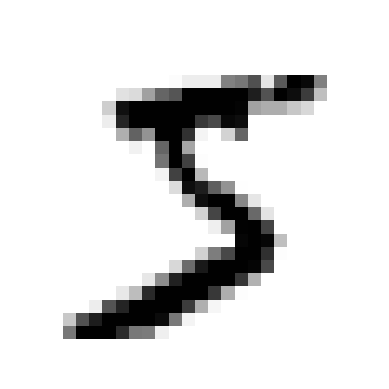

In [6]:
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y = y.astype(np.uint8)
y[0]

5

In [8]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# lets try to identify one digit - 5
y_train_5 = y_train == 5 # True for 5 only, and False for all other digits
y_test_5 = y_test == 5

In [10]:
# now lets train a Schotastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
# SGD depends on randomness during training and hence the name "schotastic"
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# now let us try to predict some digits
sgd_clf.predict(x_test)

array([False, False, False, ..., False,  True, False])

### Performance Measures


In [12]:
# Implementing Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
# Better way to evaluate the performance is to use a Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [14]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score

In [17]:
print("when it claims that an image is 5, the model is correct for ",precision_score(y_train_5, y_train_pred) *100, "%")

when it claims that an image is 5, the model is correct for  83.70879772350011 %


In [18]:
print("when it claims that an image is 5, the model detects only ", recall_score(y_train_5, y_train_pred) * 100, r"% of the 5's")

when it claims that an image is 5, the model detects only  65.11713705958311 % of the 5's


In [19]:
# F1 score is high only when precision and recall scores are high
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred) * 100, "%")

73.25171197343846 %


In [23]:
from sklearn.metrics import RocCurveDisplay, roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_pred)
#display = RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name="example estimator")
#display.plot()
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.show()

NameError: name 'auc' is not defined